In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
f=500e-3
wavelength=670e-9
b=f*wavelength

In [13]:
df2= pd.read_excel('DoubleSlit.xlsx')
print(df2)

    Distance_(pixels)  Gray_Value
0                   0      0.2871
1                   1      0.2871
2                   2      0.5933
3                   3      0.5933
4                   4      0.5933
..                ...         ...
71                 71      0.9809
72                 72      0.9187
73                 73      0.8923
74                 74      0.4785
75                 75      0.4785

[76 rows x 2 columns]


In [14]:
from scipy.optimize import curve_fit
import math
x1 = np.array(df2['Distance_(pixels)'])
I1 = np.array(df2['Gray_Value'])
print(x1)
print(I1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
[ 0.2871  0.2871  0.5933  0.5933  0.5933  0.5742  0.5742  0.555   0.555
  0.555   1.0287  1.1603  1.4091  2.0885  2.433   3.0933  3.3325  3.4306
  3.5072  3.2919  3.2536  3.8636  5.1196  7.5263 12.2153 16.8923 26.1316
 36.6244 49.2919 59.9785 70.634  81.8062 91.0096 96.2895 98.9833 98.0431
 94.8756 88.8014 80.1005 70.6029 59.4115 48.7129 38.2727 30.4617 22.823
 18.0526 14.3947 11.7943  9.7225  7.5024  5.9641  5.3852  4.6435  3.8541
  3.4833  3.0383  2.8469  2.7608  2.9067  2.9593  2.9258  2.8014  2.7321
  2.3876  2.2153  2.0431  1.5526  1.555   1.5167  1.2871  1.2488  0.9809
  0.9187  0.8923  0.4785  0.4785]


The fit parameters are:  [6.99993213e-05 6.99989311e-05 1.62124288e-08]


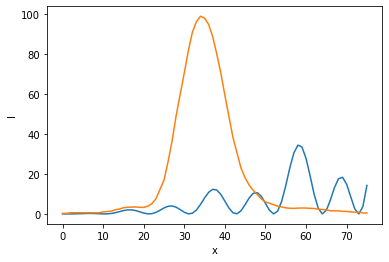

In [17]:
def single_slit_function(x,a,d,amplitude):
    return 4*amplitude*(((math.pi*a*x)/b)**2)*(np.sin((math.pi*a*x)/b)**2)*((np.cos((math.pi*d*x)/b))**2)
                                                   
guess_a = 7e-5 
guess_d = 7e-5
guess_amplitude = 1
p0 = [guess_a,guess_d,guess_amplitude]                                                   

fit = curve_fit(single_slit_function,x1,I1,p0=p0)                                                   
print('The fit parameters are: ',fit[0])
data_fit = single_slit_function(x1, *fit[0]) 
plt.xlabel('x')
plt.ylabel('I')
plt.plot(x1,data_fit)
plt.plot(x1,I1)
plt.show()  